In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
import tensorflow as tf
import cv2 as cv
import io
import PIL
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x_train=[]
y_train=[]
imagesize=150
labels=['glioma','meningioma','notumor','pituitary']

for i in labels:
    folderpath=os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training',i)
    for j in os.listdir(folderpath):
        img=cv.imread(os.path.join(folderpath,j))
        img=cv.resize(img,(imagesize,imagesize))
        x_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderpath=os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing',i)
    for j in os.listdir(folderpath):
        img=cv.imread(os.path.join(folderpath,j))
        img=cv.resize(img,(imagesize,imagesize))
        x_train.append(img)
        y_train.append(i)
        
x_train=np.array(x_train)
y_train=np.array(y_train)

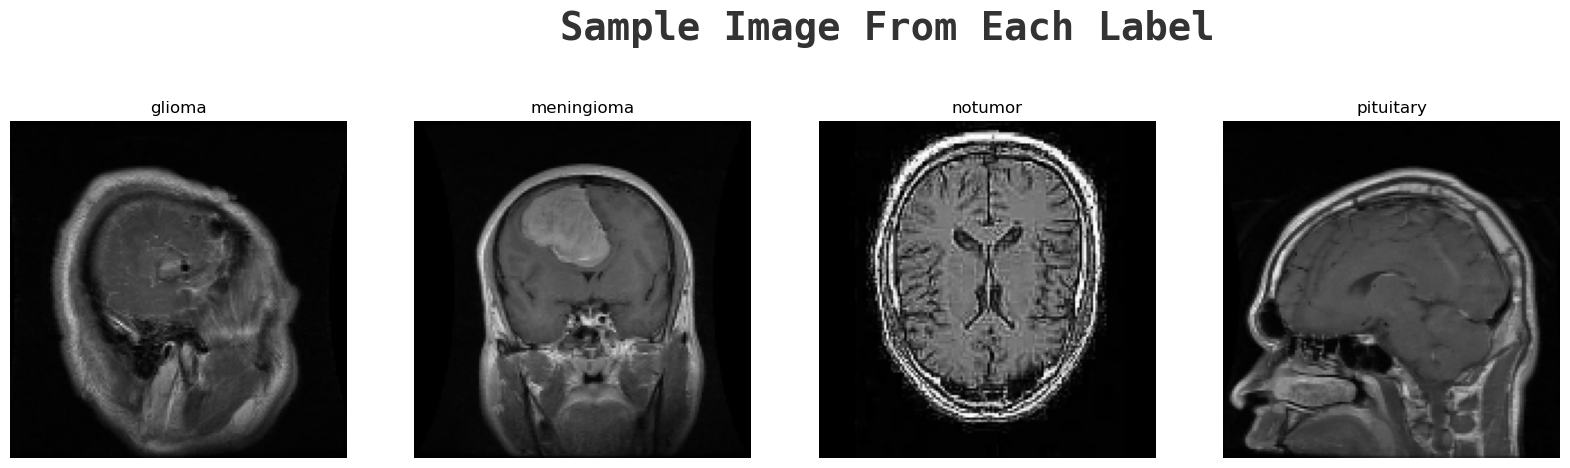

In [4]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=28,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    
    j=0
    while True :
        if y_train[j] == i:
            ax[k].imshow(x_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [5]:
x_train.shape , y_train.shape

((7023, 150, 150, 3), (7023,))

## Splitting the data 

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [7]:
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((5618, 150, 150, 3), (1405, 150, 150, 3), (5618,), (1405,))

In [8]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [9]:
y_train[0][1]

0.0

In [10]:
y_test

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

## Standardizing the dataset (Scalling)

In [11]:
x_train=x_train/x_train.max()

In [12]:
x_train.max()

1.0

In [13]:
x_test=x_test/x_test.max()

In [14]:
x_test.max()

1.0

## Building The Model

In [15]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(100,(3,3),1, activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(200,(3,3),1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(250,(3,3),1,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(300,(3,3),1,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(380,(3,3),1,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400,activation='relu'),
    
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 100)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 200)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 200)       0

In [16]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),
                  validation_split=0.1)

Epoch 1/20


2023-06-24 14:29:22.168990: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


176/176 [==============================] - 25s 83ms/step - loss: 1.2740 - accuracy: 0.3628 - val_loss: 0.9417 - val_accuracy: 0.6157
Epoch 2/20
176/176 [==============================] - 12s 69ms/step - loss: 0.7333 - accuracy: 0.7159 - val_loss: 0.6317 - val_accuracy: 0.7395
Epoch 3/20
176/176 [==============================] - 13s 73ms/step - loss: 0.5970 - accuracy: 0.7624 - val_loss: 0.5677 - val_accuracy: 0.7957
Epoch 4/20
176/176 [==============================] - 12s 69ms/step - loss: 0.4573 - accuracy: 0.8218 - val_loss: 0.4172 - val_accuracy: 0.8470
Epoch 5/20
176/176 [==============================] - 13s 73ms/step - loss: 0.3886 - accuracy: 0.8489 - val_loss: 0.3451 - val_accuracy: 0.8662
Epoch 6/20
176/176 [==============================] - 12s 70ms/step - loss: 0.3235 - accuracy: 0.8802 - val_loss: 0.3505 - val_accuracy: 0.8683
Epoch 7/20
176/176 [==============================] - 13s 73ms/step - loss: 0.2668 - accuracy: 0.9017 - val_loss: 0.3387 - val_accuracy: 0.8840
Epo

<AxesSubplot:>

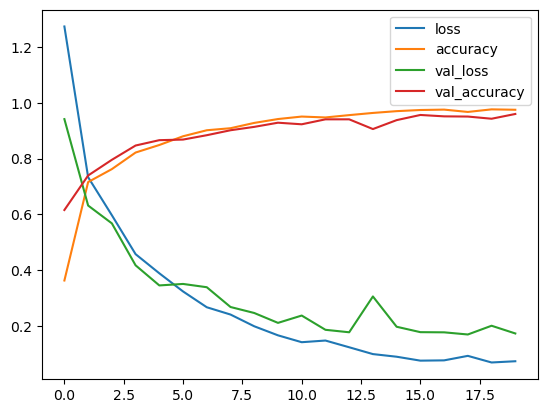

In [17]:
pd.DataFrame(history.history).plot()

In [18]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 16ms/step - loss: 0.1728 - accuracy: 0.9601


[0.1728048473596573, 0.9601423740386963]

In [19]:
from sklearn.metrics import confusion_matrix , classification_report

In [20]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

44/44 [==============================] - 1s 14ms/step


In [21]:
pred

array([2, 1, 2, ..., 2, 1, 1])

## Classification Report

In [22]:
print(classification_report(y_test_new,pred,target_names=labels))

              precision    recall  f1-score   support

      glioma       0.98      0.92      0.95       344
  meningioma       0.91      0.95      0.93       331
     notumor       0.97      0.98      0.98       393
   pituitary       0.97      0.98      0.98       337

    accuracy                           0.96      1405
   macro avg       0.96      0.96      0.96      1405
weighted avg       0.96      0.96      0.96      1405



## Confusion Matrix and Heatmap

In [23]:
con=confusion_matrix(y_test_new,pred)
con

array([[318,  22,   0,   4],
       [  4, 315,   8,   4],
       [  1,   5, 386,   1],
       [  0,   4,   3, 330]])

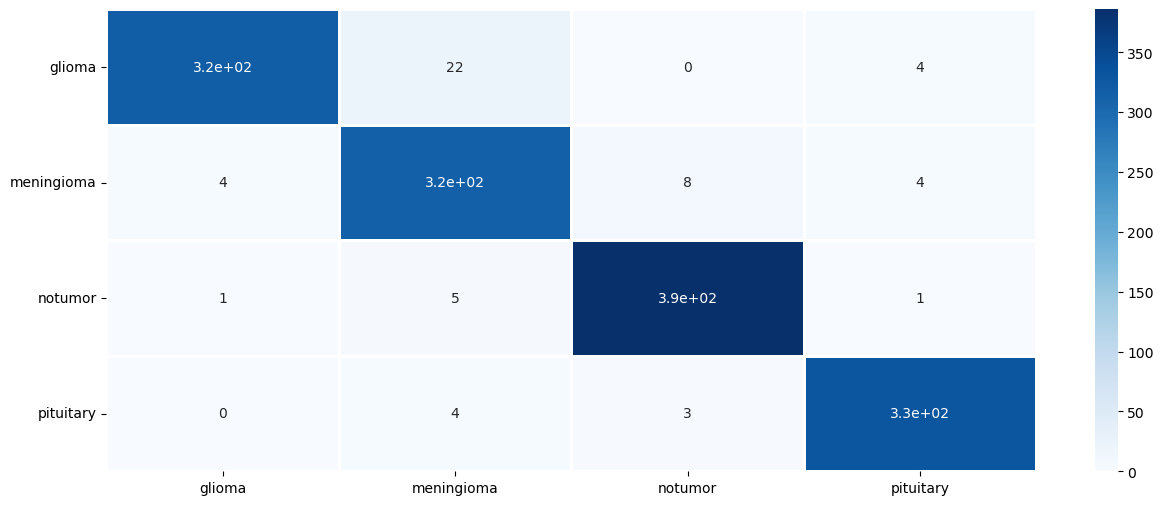

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(con,cmap='Blues',annot=True,xticklabels=labels,yticklabels=labels,
            linewidths=2)
plt.yticks(rotation='horizontal')
plt.show()

## Making Predictions

In [25]:
def prediction2(image):
    
    img=cv.imread(image)
    img=cv.resize(img,(150,150))
    img_array=np.array(img)
    
    y_pred=model.predict(np.expand_dims(img_array/255,0))
    y_pred=np.argmax(y_pred,axis=1)
    
    
    if y_pred == 0:
        print(y_pred,'= Giloma tumor')
    elif y_pred == 1:
        print(y_pred,'= Meningioma Tumor')
    elif y_pred == 2:
        print(y_pred,'= No Tumor')
    else:
        print(y_pred,'= Pituitary Tumor')
        
        
    plt.imshow(img)

1/1 [==============================] - 0s 127ms/step
[0] = Giloma tumor


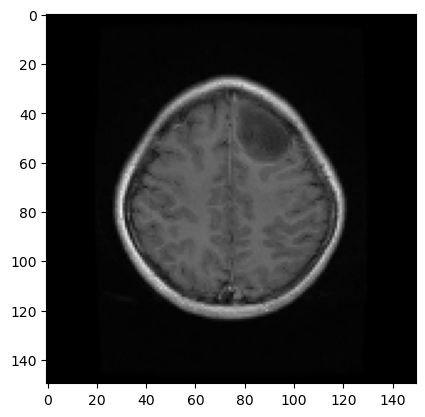

In [26]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0005.jpg')

1/1 [==============================] - 0s 21ms/step
[0] = Giloma tumor


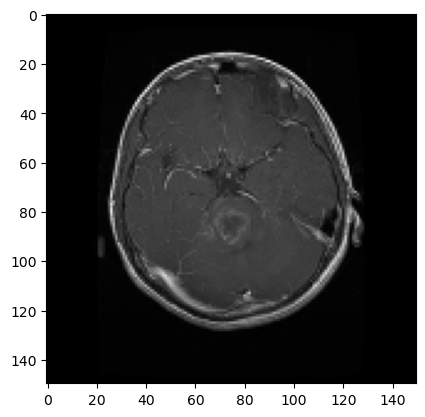

In [27]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0007.jpg')

1/1 [==============================] - 0s 20ms/step
[1] = Meningioma Tumor


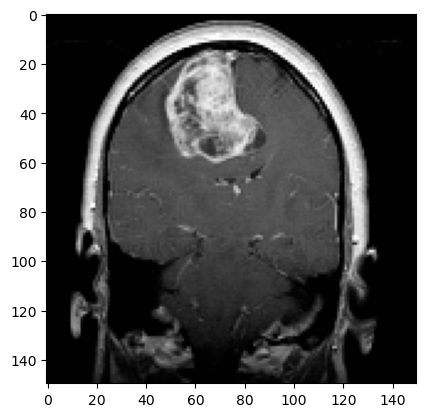

In [28]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0066.jpg')

1/1 [==============================] - 0s 22ms/step
[2] = No Tumor


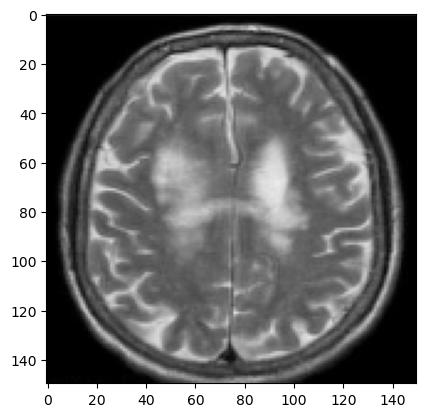

In [29]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-no_0014.jpg')

1/1 [==============================] - 0s 21ms/step
[2] = No Tumor


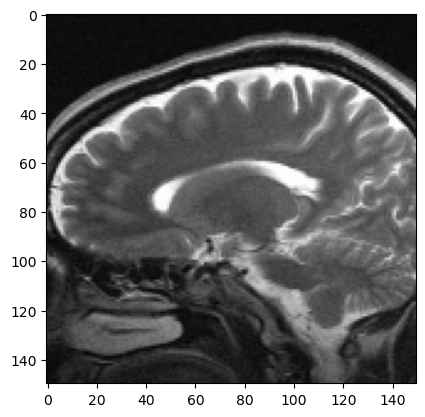

In [30]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-no_0013.jpg')

1/1 [==============================] - 0s 20ms/step
[3] = Pituitary Tumor


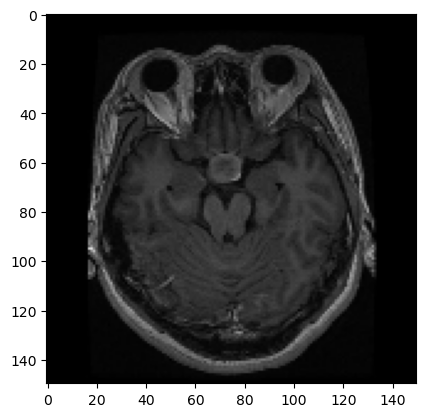

In [31]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0009.jpg')

1/1 [==============================] - 0s 20ms/step
[3] = Pituitary Tumor


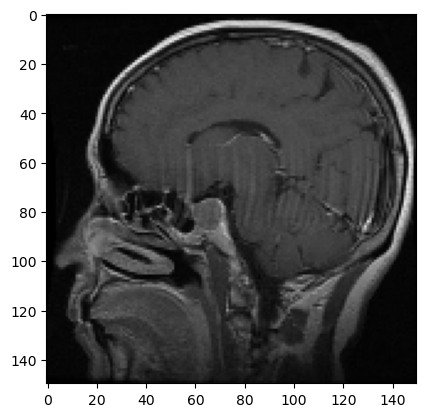

In [32]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0007.jpg')

1/1 [==============================] - 0s 19ms/step
[3] = Pituitary Tumor


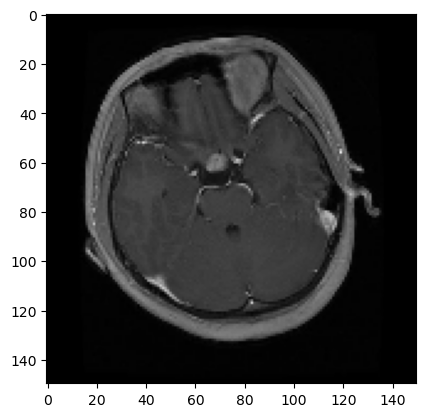

In [33]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0013.jpg')

1/1 [==============================] - 0s 19ms/step
[0] = Giloma tumor


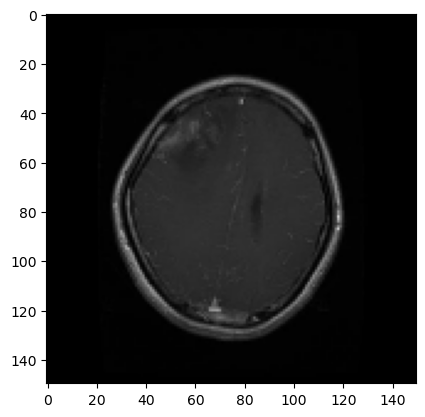

In [34]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0002.jpg')

1/1 [==============================] - 0s 21ms/step
[0] = Giloma tumor


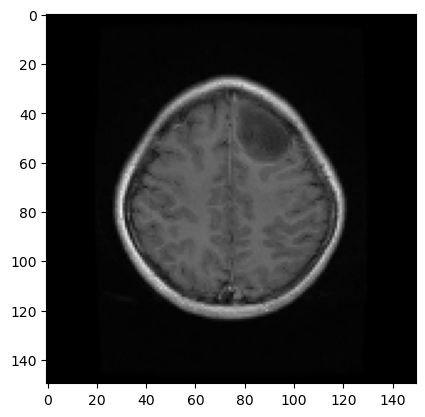

In [35]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0005.jpg')

1/1 [==============================] - 0s 21ms/step
[0] = Giloma tumor


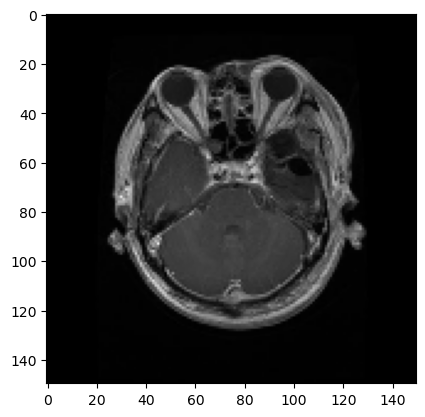

In [36]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0011.jpg')

1/1 [==============================] - 0s 23ms/step
[1] = Meningioma Tumor


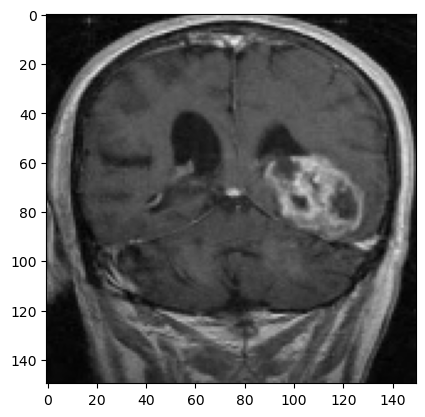

In [37]:
prediction2('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0007.jpg')